# Strain mapping with all calibrations
___

## 2D: Calibration - Rotational Calibration

Measure the rotational offset between the sample plane and the diffraction plane.  Additionally determine whether there is a coordinate system flip between the two planes, which can occur computationally during the data writing or reading.  This calibration can be performed only once and subsequently applied to additional datasets, *provided that* any scan coil rotations are accounted for.

Here, the rotational calibration is performed manually, by identifying two pairs of identical points in two images from the sample and diffraction planes.  Other automated or semiautomated methods to determine the rotational calibration are available in the DPC module, see py4DSTEM/notebooks/module_demos/dpc.
___

- Inputs:
  - HAADF / other STEM image
  - defocused CBED containing a shadow image
- Outputs:
  - RQ rotational offset
  - RQ flip

### Import packages, load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import py4DSTEM

In [3]:
# Examine contents of sampledata.h5

fp = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata.h5"
browser = py4DSTEM.file.io.FileBrowser(fp)
browser.show_dataobjects()

 Index                  Name                        Type        
   0    calibration_4DSTEM_scan             DataCube            
   1    experimental_4DSTEM_scan            DataCube            
   2    vacuum_4DSTEM_scan                  DataCube            
   3    CBED_shadow_image                   RealSlice           
   4    HAADF_image                         RealSlice           


In [4]:
# Load data

HAADF = browser.get_dataobject('HAADF_image').data
CBED = browser.get_dataobject('CBED_shadow_image').data
browser.close()

### Determine R/Q rotational offset

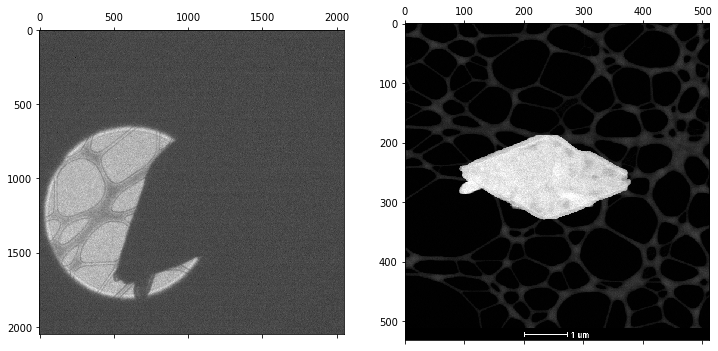

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.matshow(CBED)
ax2.matshow(HAADF)
plt.show()

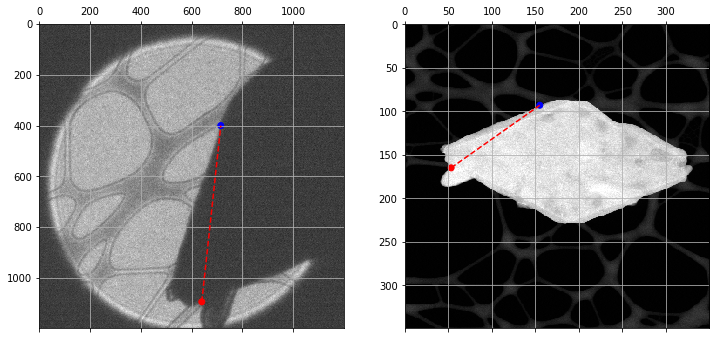

In [16]:
cbed_xlim = [600,1800]
cbed_ylim = [0,1200]
stem_xlim = [100,450]
stem_ylim = [50,400]

cbed_x = (1095,400)
cbed_y = (640,715)
stem_x = (165,93)
stem_y = (53,155)


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.matshow(CBED[cbed_xlim[0]:cbed_xlim[1],cbed_ylim[0]:cbed_ylim[1]])
ax2.matshow(HAADF[stem_xlim[0]:stem_xlim[1],stem_ylim[0]:stem_ylim[1]])
ax1.scatter(cbed_y,cbed_x,color=('r','b'))
ax1.plot(cbed_y,cbed_x,color='r',linestyle='--')
ax2.scatter(stem_y,stem_x,color=('r','b'))
ax2.plot(stem_y,stem_x,color='r',linestyle='--')
ax1.grid(True)
ax2.grid(True)
plt.show()

In [17]:
stem_angle = np.angle(stem_x[1]+1j*stem_y[1] - stem_x[0]-1j*stem_y[0], deg=True)%360
cbed_angle = np.angle(cbed_x[1]+1j*cbed_y[1] - cbed_x[0]-1j*cbed_y[0], deg=True)%360

offset_angle = stem_angle-cbed_angle

print("Real space is rotated {} degrees counterclockwise with respect to diffraction space.".format(offset_angle))

Real space is rotated -48.623244002664194 degrees counterclockwise with respect to diffraction space.


### Save

In [21]:
# Make additional dataobjects

RQ_offset = py4DSTEM.file.datastructure.PointList(coordinates=[('degrees',float)])
RQ_offset.add_point((offset_angle,))
RQ_offset.name = 'RQ_rotational_offset_degrees'

In [23]:
# Append

fp_processing = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/processing_sampledata.h5"

dataobjects = [RQ_offset]
py4DSTEM.file.io.append(dataobjects, fp_processing)

Opening file /media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/processing_sampledata.h5...
Done.
